# WEATHER PREDICTION USING BAYESIAN MODEL

### Step 1 : Imports & read the dataset

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Open and observe the shape/columns
df = pd.read_csv("weatherHistory.csv")
print(df.shape, df.columns)

(96453, 12) Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')


### Step 2 : analyse and sort the database

In [3]:
# Analysing unless columns
df['Loud Cover'].unique()

array([0.])

* In the column named Loud Cover, the values are all 0 : this column is removed

In [4]:
df.drop(['Loud Cover'], axis = 1, inplace= True)

* In the column Daily Summary, there is 214 values differents & its are complexes sentences : we also drop it

In [5]:
print(len(df['Daily Summary'].unique()), df['Daily Summary'].unique()[0:5])
df.drop(['Daily Summary'], axis = 1, inplace=True)

214 ['Partly cloudy throughout the day.' 'Mostly cloudy throughout the day.'
 'Foggy in the evening.' 'Foggy overnight and breezy in the morning.'
 'Overcast throughout the day.']


In [6]:
# Observe the lack of values in columns
(len(df)-df.count())*100/len(df)

Formatted Date              0.000000
Summary                     0.000000
Precip Type                 0.536012
Temperature (C)             0.000000
Apparent Temperature (C)    0.000000
Humidity                    0.000000
Wind Speed (km/h)           0.000000
Wind Bearing (degrees)      0.000000
Visibility (km)             0.000000
Pressure (millibars)        0.000000
dtype: float64

 * Precip Type has 0.53% of NA values, we drop the lines without value in this column

In [7]:
df.dropna(inplace=True)

In [8]:
# to study correlation, object columns need to be encoded
print(df.select_dtypes(include=['object']).columns)

Index(['Formatted Date', 'Summary', 'Precip Type'], dtype='object')


In [9]:
X_corr = pd.get_dummies(df, columns = ['Precip Type'])

In [10]:
#Formatted date will be treated after having cleaned data & Summary is removed because it is the target column
X_corr = X_corr.drop(['Formatted Date', 'Summary'], axis = 1)
X_corr.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_rain,Precip Type_snow
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,True,False
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,True,False
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,True,False
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,True,False
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,True,False


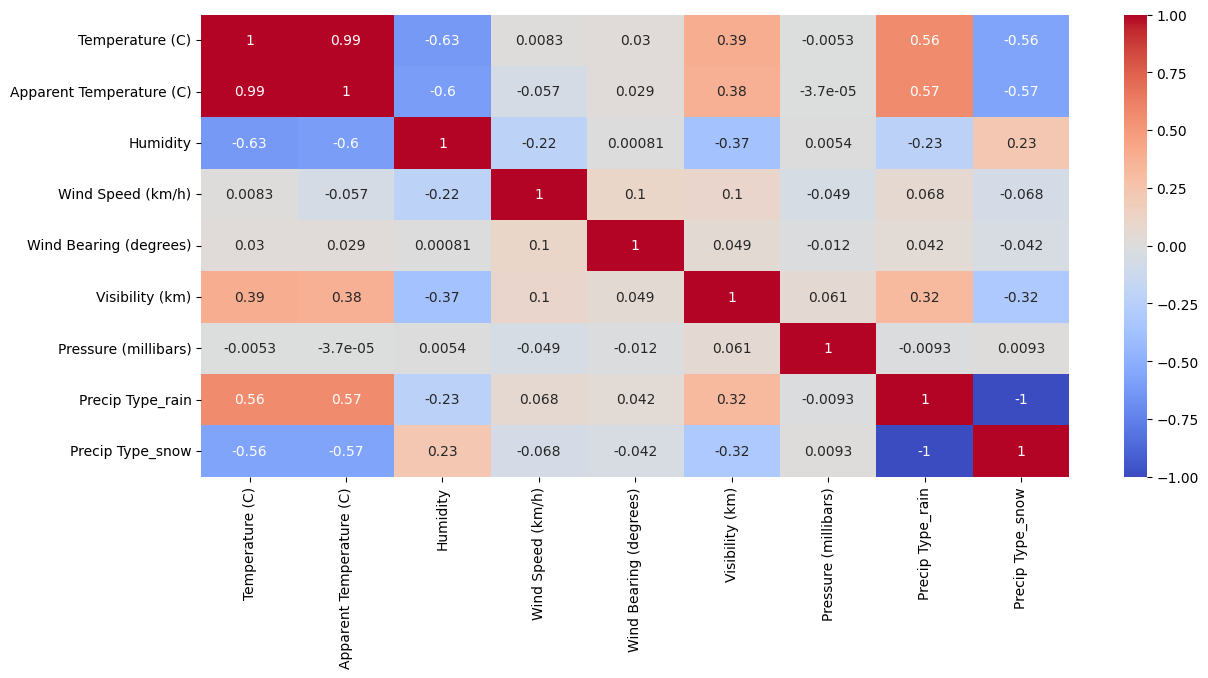

In [11]:
#plotting the matrix of correlation
corr = X_corr.corr()
plt.figure(figsize=(14,6))
sns.heatmap(corr, cmap = 'coolwarm', annot=True)
plt.show()

* temperature and apparent temperature are hightly correlated : only apparent temperature is saved

In [12]:
df.drop(['Temperature (C)'], axis = 1, inplace=True)

#encoding the column Precip Type like in X_corr
df = pd.get_dummies(df, columns = ['Precip Type'])

 * Now, the final X dataset is made

### Step 3 : Encode the Summary column (target variable).

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#encode the 27 classes of Summary column
df['Summary_encode'] = label_encoder.fit_transform(df['Summary'])

# create a wiki to find the name of the value before being encoded
class_summary = pd.DataFrame({'Class': label_encoder.classes_})

print(df['Summary_encode'].unique())
print(class_summary)

[19 17 18 12  3  6  5  4 13 15 23 25  2 26  0 11 24  7  9 21 14 16  8 22
 10  1 20]
                                  Class
0                                Breezy
1                        Breezy and Dry
2                      Breezy and Foggy
3              Breezy and Mostly Cloudy
4                   Breezy and Overcast
5              Breezy and Partly Cloudy
6                                 Clear
7   Dangerously Windy and Partly Cloudy
8                               Drizzle
9                                   Dry
10                Dry and Mostly Cloudy
11                Dry and Partly Cloudy
12                                Foggy
13              Humid and Mostly Cloudy
14                   Humid and Overcast
15              Humid and Partly Cloudy
16                           Light Rain
17                        Mostly Cloudy
18                             Overcast
19                        Partly Cloudy
20                                 Rain
21                                Wi

### Step 4 : Group the data in day thanks to the column Formatted Date

In [14]:
df.head()

,Formatted Date,Summary,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_rain,Precip Type_snow,Summary_encode
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,7.388889,0.89,14.1197,251.0,15.8263,1015.13,True,False,19
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,7.227778,0.86,14.2646,259.0,15.8263,1015.63,True,False,19
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,9.377778,0.89,3.9284,204.0,14.9569,1015.94,True,False,17
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,5.944444,0.83,14.1036,269.0,15.8263,1016.41,True,False,19
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,6.977778,0.83,11.0446,259.0,15.8263,1016.51,True,False,17


* First, the lines are grouped by day

In [15]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'].str[:-6], format='%Y-%m-%d %H:%M:%S.%f', utc=True)
df['Day'] = df['Formatted Date'].dt.date

In [16]:
df['Day'].unique()

array([datetime.date(2006, 4, 1), datetime.date(2006, 4, 10),
       datetime.date(2006, 4, 11), ..., datetime.date(2016, 9, 7),
       datetime.date(2016, 9, 8), datetime.date(2016, 9, 9)], dtype=object)

In [17]:
df.head()

,Formatted Date,Summary,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_rain,Precip Type_snow,Summary_encode,Day
0,2006-04-01 00:00:00+00:00,Partly Cloudy,7.388889,0.89,14.1197,251.0,15.8263,1015.13,True,False,19,2006-04-01
1,2006-04-01 01:00:00+00:00,Partly Cloudy,7.227778,0.86,14.2646,259.0,15.8263,1015.63,True,False,19,2006-04-01
2,2006-04-01 02:00:00+00:00,Mostly Cloudy,9.377778,0.89,3.9284,204.0,14.9569,1015.94,True,False,17,2006-04-01
3,2006-04-01 03:00:00+00:00,Partly Cloudy,5.944444,0.83,14.1036,269.0,15.8263,1016.41,True,False,19,2006-04-01
4,2006-04-01 04:00:00+00:00,Mostly Cloudy,6.977778,0.83,11.0446,259.0,15.8263,1016.51,True,False,17,2006-04-01


* Create a dataframe X_day which is composed with the mean of data by day (Object columns are dropped)

In [18]:
X_day = df.drop(['Formatted Date', 'Summary', 'Summary_encode'], axis=1)
X_day = X_day.groupby('Day').mean()
X_day.head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_rain,Precip Type_snow
Day,,,,,,,,
2006-01-01,-0.447222,0.818333,21.372750,142.041667,11.112354,1012.279167,1.0,0.0
2006-01-02,2.042593,0.844583,17.551683,161.958333,8.956967,1010.131667,1.0,0.0
2006-01-03,0.223843,0.898333,8.417617,248.541667,9.011975,1020.805000,1.0,0.0
2006-01-04,-0.457407,0.905417,11.579925,46.916667,8.339129,981.826667,1.0,0.0
2006-01-05,0.256481,0.948333,9.515100,140.375000,4.628750,935.988333,1.0,0.0


* For Summary_encode (which is renamed y), the most represented value is retained

In [19]:
# Group by Day and keep the most represented value
grouped_by_day = df[['Day', 'Summary_encode']].groupby('Day')['Summary_encode']
y = grouped_by_day.apply(lambda x: x.mode().iloc[0])
y = y.reset_index(name='y')

In [20]:
X_day.columns

Index(['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Precip Type_rain', 'Precip Type_snow'],
      dtype='object')

### Step 5 : Set the dynamic Bayesian Model

In [65]:
#IMPORTS
from pgmpy.models import DynamicBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import DBNInference

* Create and add nodes to the model

In [47]:
# Create the dynamic Bayesian Network
DBN_model = DynamicBayesianNetwork()

# Add nodes
DBN_model.add_nodes_from(['y', 'Humidity'])

print(DBN_model.nodes())

[<DynamicNode(y, 0) at 0x2570ba35e90>, <DynamicNode(Humidity, 0) at 0x2570bba1750>]


* Add edges to the model

In [49]:
# Add edges
DBN_model.add_edges_from([(('Humidity',0), ('y',0)),
                         (('y',0), ('y',1)),
                         (('Humidity',0), ('Humidity',1))])

print(DBN_model.edges())

[(<DynamicNode(y, 0) at 0x2570ba35e90>, <DynamicNode(y, 1) at 0x2570bc23410>), (<DynamicNode(Humidity, 0) at 0x2570bba1750>, <DynamicNode(y, 0) at 0x2570bba0250>), (<DynamicNode(Humidity, 0) at 0x2570bba1750>, <DynamicNode(Humidity, 1) at 0x2570bc23f50>), (<DynamicNode(Humidity, 1) at 0x2570bba1810>, <DynamicNode(y, 1) at 0x2570bba0290>)]



* Add probabilities

In [61]:
y_cpd = TabularCPD(('y', 0), 2, [[0.1, 0.8], 
                                       [0.9, 0.2]], 
                    evidence=[('Humidity', 0)], 
                    evidence_card=[2])

Humidity_cpd = TabularCPD(('Humidity', 1), 2, [[0.5, 0.5], 
                                                [0.5, 0.5]], 
                            evidence=[('Humidity', 0)], 
                            evidence_card=[2])

transition_cpd = TabularCPD(('y', 1), 2, [[0.25, 0.9, 0.1, 0.25], 
                                            [0.75, 0.1, 0.9, 0.75]], 
                                            evidence=[('y', 0), ('Humidity', 1)], 
                                            evidence_card=[2, 2])

C:\Users\33695\AppData\Local\Temp\ipykernel_46564\4197998115.py:1: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  y_cpd = TabularCPD(('y', 0), 2, [[0.1, 0.8],
C:\Users\33695\AppData\Local\Temp\ipykernel_46564\4197998115.py:6: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  Humidity_cpd = TabularCPD(('Humidity', 1), 2, [[0.5, 0.5],
C:\Users\33695\AppData\Local\Temp\ipykernel_46564\4197998115.py:11: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  transition_cpd = TabularCPD(('y', 1), 2, [[0.25, 0.9, 0.1, 0.25],


* add_cpds to the model

In [64]:
DBN_model.add_cpds(y_cpd, Humidity_cpd, transition_cpd)
DBN_model.initialize_initial_state()
DBN_model.check_model()

C:\Users\33695\AppData\Local\Temp\ipykernel_46564\273119128.py:3: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  DBN_model.check_model()


True

* The model is valid

In [66]:
map = {0: 'Sunny', 1: 'Rainy'}
dbn_inf = DBNInference(DBN_model)
result = dbn_inf.forward_inference([('y',1)], {('Humidity', 1): 0, ('y', 0):0})

In [68]:
arr = result[('y', 1)].values

In [69]:
arr

array([0.25, 0.75])

In [71]:
import numpy as np 

print('Prediction (y(1) : Yes, Weather(0): Sunny): {0} ({1} %)'.format(map[np.argmax(arr)], np.max(arr) * 100))


Prediction (y(1) : Yes, Weather(0): Sunny): Rainy (75.0 %)
